In [1]:
#Include libraries
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from google.colab import files
import io

#Setting the local folder path
#os.getcwd()
#os.chdir(r"/content/drive/My Drive/Assignment")

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
print("Shape of the training dataset, number of images and resolution:", train_images.shape)
print("Shape of the testing dataset, number of images and resolution:", test_images.shape)
print("All distinct training labels:", np.unique(train_labels))

Shape of the training dataset, number of images and resolution: (50000, 32, 32, 3)
Shape of the testing dataset, number of images and resolution: (10000, 32, 32, 3)
All distinct training labels: [0 1 2 3 4 5 6 7 8 9]


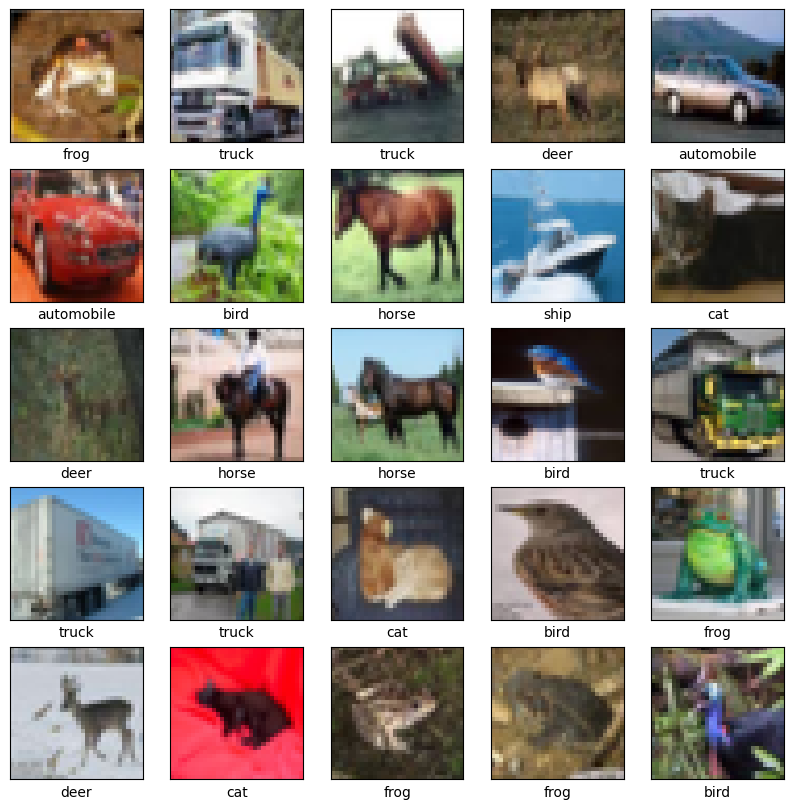

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CNN_trained = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.4121 - accuracy: 0.4938 - val_loss: 1.0949 - val_accuracy: 0.6117
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9963 - accuracy: 0.6469 - val_loss: 0.9743 - val_accuracy: 0.6529
Epoch 3/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8375 - accuracy: 0.7082 - val_loss: 0.9032 - val_accuracy: 0.6837
Epoch 4/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.7302 - accuracy: 0.7451 - val_loss: 0.8285 - val_accuracy: 0.7116
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.6450 - accuracy: 0.7748 - val_loss: 0.8315 - val_accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.5695 - accuracy: 0.8019 - val_loss: 0.8664 - val_accuracy: 0.7166
Epoch 7/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.4964 - accuracy: 0.8264 - val_loss: 0.

In [ ]:
results = model.evaluate(test_images, test_labels,batch_size=128)
print("test loss, test acc:", results)
predictions = model.predict(test_images[:3])
print("predictions shape:", predictions.shape)

79/79 [==============================] - 5s 65ms/step - loss: 1.0276 - accuracy: 0.7263
test loss, test acc: [1.0276129245758057, 0.7263000011444092]
predictions shape: (3, 10)


Training Results:

Epoch 1/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3883 - accuracy: 0.4967 - val_loss: 1.0930 - val_accuracy: 0.6134

Epoch 2/10
1563/1563 [==============================] - 116s 75ms/step - loss: 0.9991 - accuracy: 0.6500 - val_loss: 0.9595 - val_accuracy: 0.6644

Epoch 3/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.8314 - accuracy: 0.7102 - val_loss: 0.8657 - val_accuracy: 0.7038

Epoch 4/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7152 - accuracy: 0.7494 - val_loss: 0.8160 - val_accuracy: 0.7180

Epoch 5/10
1563/1563 [==============================] - 115s 73ms/step - loss: 0.6293 - accuracy: 0.7800 - val_loss: 0.8114 - val_accuracy: 0.7203

Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.5467 - accuracy: 0.8095 - val_loss: 0.8579 - val_accuracy: 0.7228

Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.4769 - accuracy: 0.8329 - val_loss: 0.8533 - val_accuracy: 0.7311

Epoch 8/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.4091 - accuracy: 0.8551 - val_loss: 0.9213 - val_accuracy: 0.7189

Epoch 9/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.3518 - accuracy: 0.8767 - val_loss: 0.9522 - val_accuracy: 0.7256

Epoch 10/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.3007 - accuracy: 0.8932 - val_loss: 1.0276 - val_accuracy: 0.7263

Testing Results:

79/79 [==============================] - 5s 65ms/step - loss: 1.0276 - accuracy: 0.7263
test loss, test acc: [1.0276129245758057, 0.7263000011444092]
predictions shape: (3, 10)

In [ ]:
from scipy.ndimage import rotate
def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

B) 1: Image mirroring

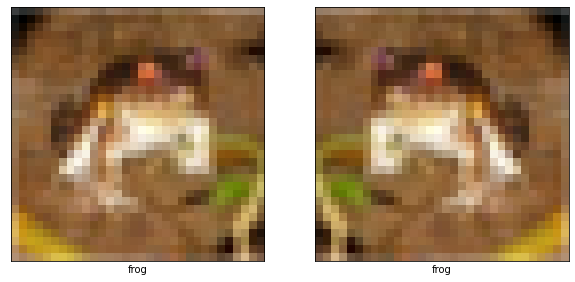

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0][0]])
plt.subplot(1,2,2)
aug_image = np.flip(train_images[0],1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(aug_image, cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

B) 1: Image Rotation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


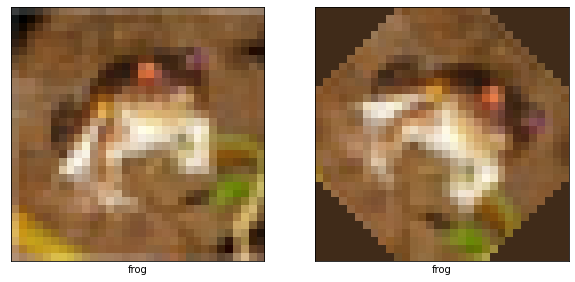

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0], cmap=plt.cm.binary)
# The CIFAR labels happen to be arrays,
# which is why you need the extra index
plt.xlabel(class_names[train_labels[0][0]])
plt.subplot(1,2,2)
aug_image = rotate_img(train_images[0],-45)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(aug_image, cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

B)2: Expand training set with image augmentation

In [ ]:
aug_train_images = list(train_images)
aug_train_labels = list(train_labels)
for i in range(0,len(train_images)):
  aug1 = np.flip(train_images[i],1)
  if i % 2 == 0:
    aug2 = rotate_img(train_images[i], 45)
  else:
    aug2 = rotate_img(train_images[i], -45)

  aug_train_images.append(aug1)
  aug_train_labels.append(train_labels[i])
  aug_train_images.append(aug2)
  aug_train_labels.append(train_labels[i])

print(len(aug_train_images))

150000


In [ ]:
aug_train_images = np.asarray(aug_train_images)
aug_train_labels = np.asarray(aug_train_labels)
print("Shape of the training dataset, number of images and resolution:", aug_train_images.shape)

Shape of the training dataset, number of images and resolution: (150000, 32, 32, 3)


B)3: Train model with augemented dataset

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_trained_aug = model.fit(aug_train_images, aug_train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
results = model.evaluate(test_images, test_labels,batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 6s 70ms/step - loss: 0.8133 - accuracy: 0.7458
test loss, test acc: [0.8132851123809814, 0.7458000183105469]


Training Results:

Epoch 1/10
4688/4688 [==============================] - 336s 71ms/step - loss: 1.3370 - accuracy: 0.5206 - val_loss: 0.9955 - val_accuracy: 0.6469

Epoch 2/10
4688/4688 [==============================] - 335s 71ms/step - loss: 1.0004 - accuracy: 0.6482 - val_loss: 0.8401 - val_accuracy: 0.7024

Epoch 3/10
4688/4688 [==============================] - 333s 71ms/step - loss: 0.8829 - accuracy: 0.6913 - val_loss: 0.7844 - val_accuracy: 0.7281

Epoch 4/10
4688/4688 [==============================] - 333s 71ms/step - loss: 0.8029 - accuracy: 0.7192 - val_loss: 0.7703 - val_accuracy: 0.7352

Epoch 5/10
4688/4688 [==============================] - 335s 71ms/step - loss: 0.7437 - accuracy: 0.7399 - val_loss: 0.7923 - val_accuracy: 0.7279

Epoch 6/10
4688/4688 [==============================] - 335s 71ms/step - loss: 0.6906 - accuracy: 0.7574 - val_loss: 0.7452 - val_accuracy: 0.7494

Epoch 7/10
4688/4688 [==============================] - 336s 72ms/step - loss: 0.6457 - accuracy: 0.7736 - val_loss: 0.7730 - val_accuracy: 0.7410

Epoch 8/10
4688/4688 [==============================] - 338s 72ms/step - loss: 0.6071 - accuracy: 0.7862 - val_loss: 0.7590 - val_accuracy: 0.7506

Epoch 9/10
4688/4688 [==============================] - 335s 71ms/step - loss: 0.5752 - accuracy: 0.7977 - val_loss: 0.7925 - val_accuracy: 0.7469

Epoch 10/10
4688/4688 [==============================] - 336s 72ms/step - loss: 0.5431 - accuracy: 0.8082 - val_loss: 0.8133 - val_accuracy: 0.7458

Testing Results:
79/79 [==============================] - 6s 70ms/step - loss: 0.8133 - accuracy: 0.7458
test loss, test acc: [0.8132851123809814, 0.7458000183105469]

B) 3:  After adding data augmentation the test accuracy increased from 0.7263 to 0.7458. This increase is caused by enlearging the dataset and adding variations to the dataset that may be encompass more test/real-world examples.


B) 4: Batch Normalization and Dropout layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_trained_aug = model.fit(aug_train_images, aug_train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
4688/4688 [==============================] - 417s 89ms/step - loss: 1.3728 - accuracy: 0.5144 - val_loss: 1.0392 - val_accuracy: 0.6376
Epoch 2/10
4688/4688 [==============================] - 428s 91ms/step - loss: 1.0398 - accuracy: 0.6350 - val_loss: 0.8899 - val_accuracy: 0.6926
Epoch 3/10
4688/4688 [==============================] - 419s 89ms/step - loss: 0.9124 - accuracy: 0.6805 - val_loss: 0.8375 - val_accuracy: 0.7112
Epoch 4/10
4688/4688 [==============================] - 417s 89ms/step - loss: 0.8312 - accuracy: 0.7090 - val_loss: 0.7056 - val_accuracy: 0.7570
Epoch 5/10
4688/4688 [==============================] - 405s 86ms/step - loss: 0.7648 - accuracy: 0.7323 - val_loss: 0.7485 - val_accuracy: 0.7435
Epoch 6/10
4688/4688 [==============================] - 405s 86ms/step - loss: 0.7231 - accuracy: 0.7458 - val_loss: 0.7751 - val_accuracy: 0.7391
Epoch 7/10
4688/4688 [==============================] - 421s 90ms/step - loss: 0.6833 - accuracy: 0.7612 - val_loss: 0

In [ ]:
results = model.evaluate(test_images, test_labels,batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 6s 81ms/step - loss: 0.6269 - accuracy: 0.7911
test loss, test acc: [0.6268539428710938, 0.791100025177002]


Training Results:

Epoch 1/10
4688/4688 [==============================] - 417s 89ms/step - loss: 1.3728 - accuracy: 0.5144 - val_loss: 1.0392 - val_accuracy: 0.6376

Epoch 2/10
4688/4688 [==============================] - 428s 91ms/step - loss: 1.0398 - accuracy: 0.6350 - val_loss: 0.8899 - val_accuracy: 0.6926

Epoch 3/10
4688/4688 [==============================] - 419s 89ms/step - loss: 0.9124 - accuracy: 0.6805 - val_loss: 0.8375 - val_accuracy: 0.7112

Epoch 4/10
4688/4688 [==============================] - 417s 89ms/step - loss: 0.8312 - accuracy: 0.7090 - val_loss: 0.7056 - val_accuracy: 0.7570

Epoch 5/10
4688/4688 [==============================] - 405s 86ms/step - loss: 0.7648 - accuracy: 0.7323 - val_loss: 0.7485 - val_accuracy: 0.7435

Epoch 6/10
4688/4688 [==============================] - 405s 86ms/step - loss: 0.7231 - accuracy: 0.7458 - val_loss: 0.7751 - val_accuracy: 0.7391

Epoch 7/10
4688/4688 [==============================] - 421s 90ms/step - loss: 0.6833 - accuracy: 0.7612 - val_loss: 0.6495 - val_accuracy: 0.7787

Epoch 8/10
4688/4688 [==============================] - 414s 88ms/step - loss: 0.6521 - accuracy: 0.7712 - val_loss: 0.6456 - val_accuracy: 0.7789

Epoch 9/10
4688/4688 [==============================] - 436s 93ms/step - loss: 0.6254 - accuracy: 0.7790 - val_loss: 0.6204 - val_accuracy: 0.7897

Epoch 10/10
4688/4688 [==============================] - 428s 91ms/step - loss: 0.6017 - accuracy: 0.7877 - val_loss: 0.6269 - val_accuracy: 0.7911

Testing Results:

79/79 [==============================] - 6s 81ms/step - loss: 0.6269 - accuracy: 0.7911
test loss, test acc: [0.6268539428710938, 0.791100025177002]

In [34]:
# Function to predict the class of an image and display it
def predict_and_display_image(model, image_path, class_names):
    img = preprocess_image(image_path)
    # Predict the class of the image
    predictions = model.predict(img)
    # Get the index of the class with highest probability
    predicted_class_index = np.argmax(predictions[0])
    # Get the name of the class
    predicted_class_name = class_names[predicted_class_index]
    # Get the confidence of the prediction
    confidence = np.max(tf.nn.softmax(predictions[0]))*100

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print the predicted class and confidence on the same line with some spacing
    print(f'Predicted class: {predicted_class_name:<15} Confidence: {confidence:.2f}%')

Image-1

1/1 [==============================] - 0s 21ms/step


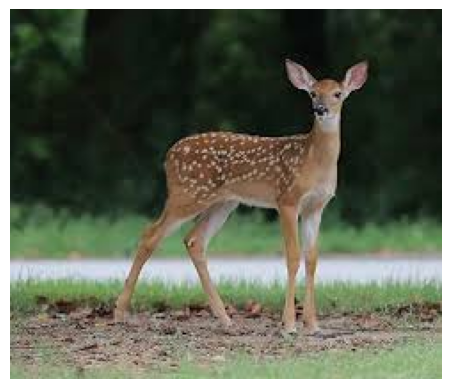

Predicted class: deer            Confidence: 73.37%


In [35]:
# Test the function
image_path =  '/content/images.jpg'
predict_and_display_image(model, image_path, class_names)

Image-2

1/1 [==============================] - 0s 32ms/step


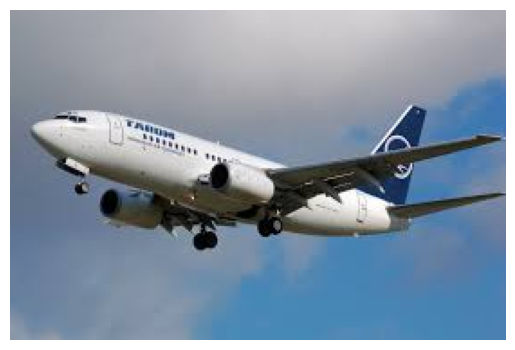

Predicted class: airplane        Confidence: 100.00%


In [36]:
image_path =  '/content/download.jpg'
predict_and_display_image(model, image_path, class_names)

Upload the image and check it


Saving Disney-Treasure-Exterior-2-1-1.jpg to Disney-Treasure-Exterior-2-1-1.jpg
1/1 [==============================] - 0s 20ms/step


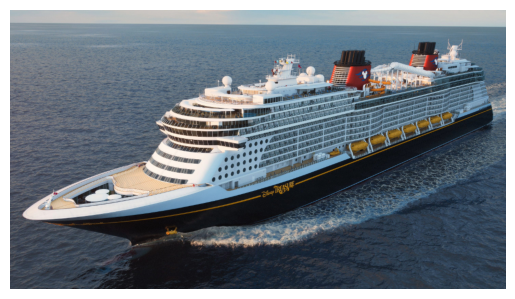

Predicted class: ship            Confidence: 99.99%


In [39]:
from google.colab import files
import io

# Upload the image file
uploaded = files.upload()

# Get the file name and path
image_path = list(uploaded.keys())[0]

# Predict and display the image
predict_and_display_image(model, image_path, class_names)